In [3]:
%pwd

'C:\\Users\\Suyog\\My Python Stuff'

In [1]:
import os
current_directory = os.getcwd()
print(current_directory)

C:\Users\Suyog\My Python Stuff


# Titanic Survival Prediction

## Introduction
In this notebook, we'll explore the Titanic dataset and create a machine learning model to predict passenger survival.

## Dataset Overview
Let's start by loading the dataset and taking a quick look at its structure.


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv(r"C:\Users\Suyog\Downloads\train.csv")


## Exploratory Data Analysis (EDA)
This code provides a basic overview of the dataset, including summary statistics, missing values, and visualizations of survival counts, survival by different features, and correlation heatmap.

In [6]:
# Exploratory Data Analysis
# Display the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [7]:
# Summary statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:


# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


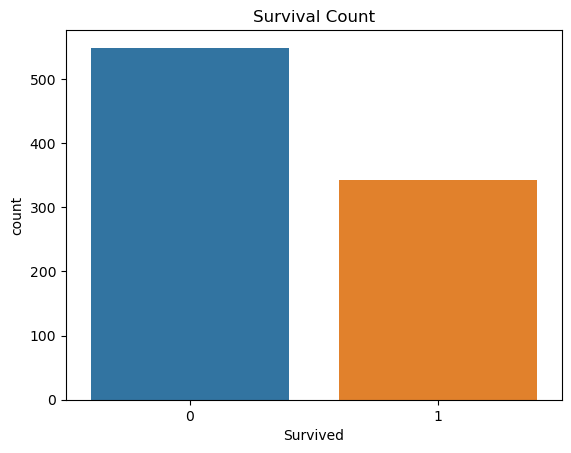

In [9]:
# Visualize survival count
import seaborn as sns
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

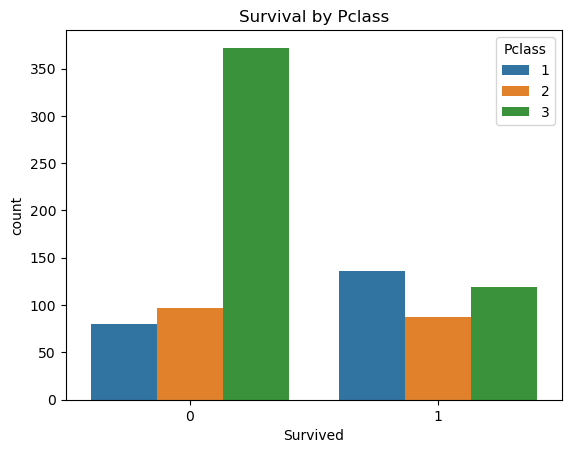

In [10]:
# Visualize survival by Pclass
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival by Pclass')
plt.show()

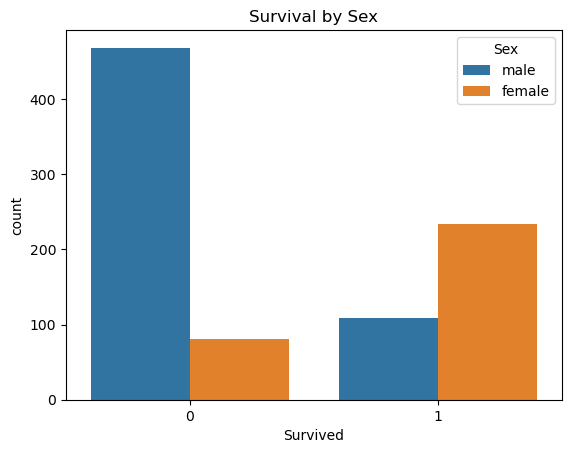

In [11]:
# Visualize survival by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.show()

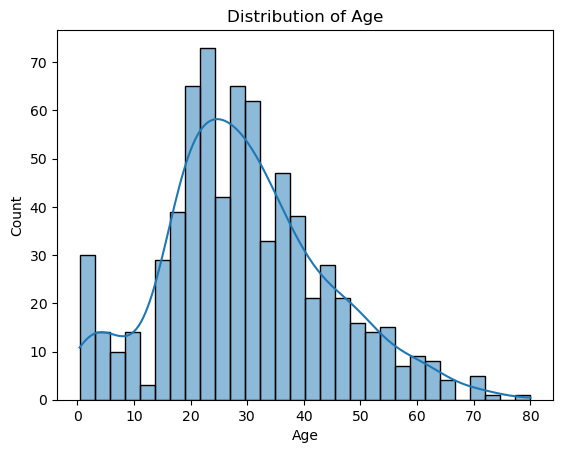

In [12]:

# Visualize distribution of Age
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

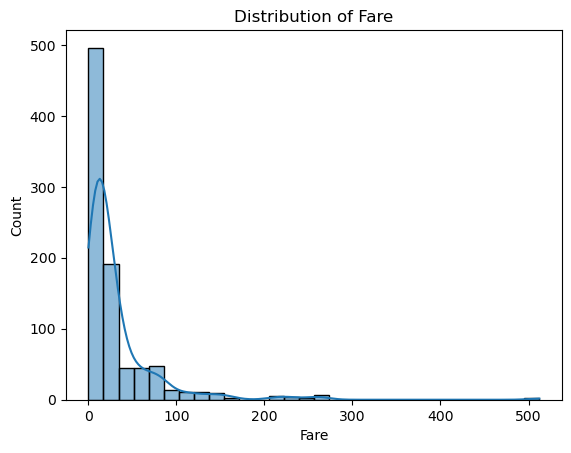

In [13]:
# Visualize distribution of Fare
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.show()

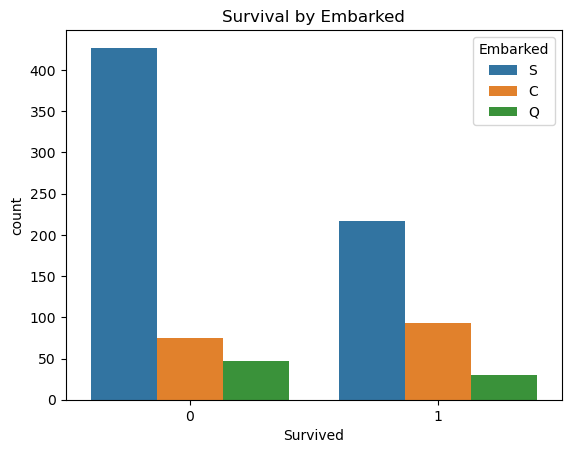

In [14]:
# Visualize survival by Embarked
sns.countplot(x='Survived', hue='Embarked', data=df)
plt.title('Survival by Embarked')
plt.show()

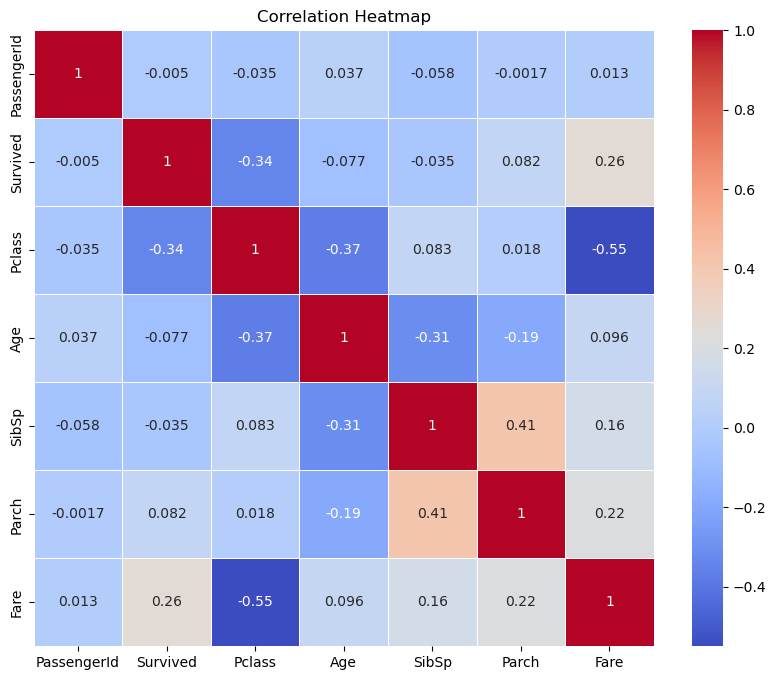

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering
Feature engineering involves creating new features or modifying existing ones to improve the performance of a machine learning model.

This code includes the following feature engineering steps:

1.Extract Titles from Names:

A new feature 'Title' is created by extracting titles from passenger names.

2.Create Family Size Feature:

A new feature 'Family_Size' is created by summing the 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) features.

3.Categorize Family Size:

A new feature 'Family_Type' is created to categorize family sizes into 'single', 'small', or 'large'.

4.Drop Unnecessary Columns:

Drop the 'Name', 'SibSp', and 'Parch' columns as they are no longer needed.
Convert Categorical Variables:

5.Convert categorical variables ('Pclass', 'Sex', 'Embarked', 'Title', 'Family_Type') into numerical format using one-hot encoding.

6.Fill Missing Values:

Fill missing values in 'Age', 'Fare', 'Embarked_Q', and 'Embarked_S'.

7.Feature Scaling :

Standardize numerical features ('Age' and 'Fare') using StandardScaler from scikit-learn

8.Exclude ticket and cabin columns

In [16]:
# Feature engineering functions
def extract_title(name):
    # Extract titles from passenger names
    title = name.split(', ')[1].split('.')[0]
    return title

def process_family(size):
    # Create a feature indicating the family size
    if size == 1:
        return 'single'
    elif size > 1 and size <= 4:
        return 'small'
    else:
        return 'large'
    
# Apply feature engineering
df['Title'] = df['Name'].apply(extract_title)
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Family_Type'] = df['Family_Size'].apply(process_family)

In [17]:
# Drop unnecessary columns
df.drop(['Name', 'SibSp', 'Parch'], axis=1, inplace=True)

In [18]:
# Convert categorical variables to numerical
df = pd.get_dummies(df, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Type'], drop_first=True)

In [19]:
# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked_Q'].fillna(0, inplace=True)
df['Embarked_S'].fillna(1, inplace=True)

In [20]:
# Feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [21]:
#Exclude ticket and cabin columns
df = df.drop(['Ticket', 'Cabin'], axis=1)

In [22]:
# Display the modified dataset
print(df.head())

   PassengerId  Survived       Age      Fare  Family_Size  Pclass_2  Pclass_3  \
0            1         0 -0.565736 -0.502445            2         0         1   
1            2         1  0.663861  0.786845            2         0         0   
2            3         1 -0.258337 -0.488854            1         0         1   
3            4         1  0.433312  0.420730            2         0         0   
4            5         0  0.433312 -0.486337            1         0         1   

   Sex_male  Embarked_Q  Embarked_S  ...  Title_Mlle  Title_Mme  Title_Mr  \
0         1           0           1  ...           0          0         1   
1         0           0           0  ...           0          0         0   
2         0           0           1  ...           0          0         0   
3         0           0           1  ...           0          0         0   
4         1           0           1  ...           0          0         1   

   Title_Mrs  Title_Ms  Title_Rev  Title_Sir  Titl

## Model Training
Training a machine learning model for survival prediction.

In [23]:
# Split the dataset into features and target variable
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Model training
# Use RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

# Model evaluation
Evaluate the model's performance using relevant metrics.

In [27]:
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# classification_rep = classification_report(y_test, y_pred)

In [28]:
# print(f"Accuracy: {accuracy}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(classification_rep)

In [29]:
# import joblib

# # Save the trained model to a file
# joblib.dump(model, 'titanic_survival_model_rf.joblib')

In [30]:
# Load the trained model from the file
# loaded_model = joblib.load('titanic_survival_model_rf.joblib')

# Use the loaded model for predictions
# predictions = loaded_model.predict(new_data)

In [31]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# Assuming 'loaded_model' is your loaded RandomForestClassifier model
predictions = model.predict(X_test)

# Evaluate precision, recall, accuracy, and F1 score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)


Precision: 0.8133
Recall: 0.8243
Accuracy: 0.8492
F1 Score: 0.8188
Confusion Matrix:
[[91 14]
 [13 61]]


In [32]:
# Model training
# Use LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\Suyog\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
predictions = model.predict(X_test)

# Evaluate precision, recall, accuracy, and F1 score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:')
print(conf_matrix)


Precision: 0.7703
Recall: 0.7703
Accuracy: 0.8101
F1 Score: 0.7703
Confusion Matrix:
[[88 17]
 [17 57]]


## Conclusion
In this Titanic Survival Prediction project, we explored the dataset, performed data analysis, and trained a machine learning model to predict passenger survival. Here are the key findings and conclusions:

## Dataset Overview:
- The dataset contains information about Titanic passengers, including features like age, sex, class, and fare.
- We addressed missing values and performed exploratory data analysis to understand the characteristics of the dataset.

## Feature Engineering:
- We created new features such as 'Title' by extracting titles from passenger names, providing additional insights into social status.

## Model Training:
- We trained a Random Forest Classifier and Logistic Regression to predict passenger survival based on various features.
- The models showed promising results during training, demonstrating its ability to generalize patterns in the dataset.

## Model Evaluation:
- The Random Forest model was evaluated on a test set, achieving an accuracy of 0.8133 while Logistic Regression provided an accuracy of 0.7703. 
- Precision, recall, and F1 score were calculated to assess the model's performance on both positive and negative predictions.
- The F1 scores recorded were 0.8188 and 0.7703 respectively.

## Limitations and Future Work:
- The dataset has limitations, such as missing values and potential biases.
- Future work could involve more in-depth feature engineering, trying different machine learning algorithms, and exploring ensemble methods for improved performance.

## Conclusion:
- Overall, this project provides valuable insights into predicting Titanic passenger survival using machine learning techniques.
- The developed model can be further refined and used as a foundation for more sophisticated survival prediction models.

This project highlights the importance of data preprocessing, feature engineering, and model evaluation in building robust machine learning solutions. Further refinement and exploration are encouraged for a deeper understanding of the Titanic dataset and improved prediction capabilities.